In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
where = os.path.join(os.getcwd(), 'data')

# Main figure

## Network - Embryo

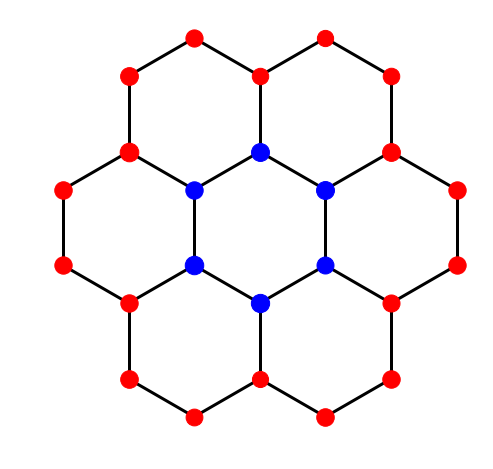

In [8]:
areas = np.loadtxt(os.path.join(where, 'lumen.dat'), usecols=3)
lumen_type = np.loadtxt(os.path.join(where, 'lumen.dat'), usecols=4, dtype=int)
coordinates = np.loadtxt(os.path.join(where, 'lumen_coord.dat'))
edge_list = np.loadtxt(os.path.join(where, 'lumen_lumen.dat'), usecols=(0, 1), dtype=int)

color_list = ['blue', 'red', 'green', 'orange']

plt.figure(figsize=(8, 8))
for i in range(len(coordinates)) :
    plt.scatter(coordinates[i, 0], coordinates[i, 1], s=areas[i]*300, color=color_list[lumen_type[i]], zorder=1)
for k in range(len(edge_list)) :
    plt.plot((coordinates[edge_list[k, 0]][0], coordinates[edge_list[k, 1]][0]), (coordinates[edge_list[k, 0]][1], coordinates[edge_list[k, 1]][1]), color='k', zorder=0, linewidth=3)

plt.axis('equal')
plt.axis('off')
plt.show()

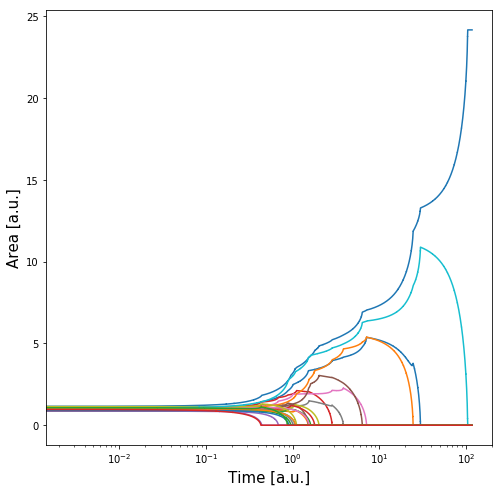

In [4]:
area_dynamics = np.loadtxt(os.path.join(where, 'out/area.dat'))

plt.figure(figsize=(8, 8))
plt.xscale('log')
for i in range(len(area_dynamics[0])-1) :
    plt.plot(area_dynamics[:, 0], area_dynamics[:, i+1])

plt.xlabel('Time [a.u.]', fontsize=15)
plt.ylabel('Area [a.u.]', fontsize=15)

plt.show()

## Diagram

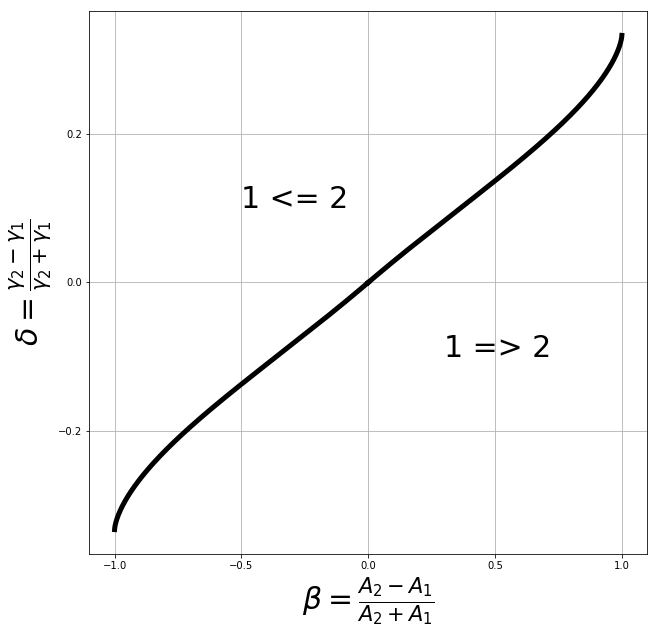

In [26]:
beta, delta = np.loadtxt(os.path.join(where, 'beta_vs_delta.dat'), unpack=True)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
plt.locator_params(nbins=5)

ax.plot(beta, delta, linewidth=5, color='k', zorder=10)
ax.text(x=0.3, y=-0.1, s='1 => 2', fontsize=30)
ax.text(x=-0.5, y=0.1, s='1 <= 2', fontsize=30)
ax.set_ylabel(r'$\delta=\frac{\gamma_{2}-\gamma_{1}}{\gamma_{2}+\gamma_{1}}$', fontsize=30)

ax.set_xlabel(r'$\beta=\frac{A_{2}-A_{1}}{A_{2}+A_{1}}$', fontsize=30)

ax.grid()

plt.show()

## Area Evolution (with pumping, $\lambda_p = 3.10^{-3}$)

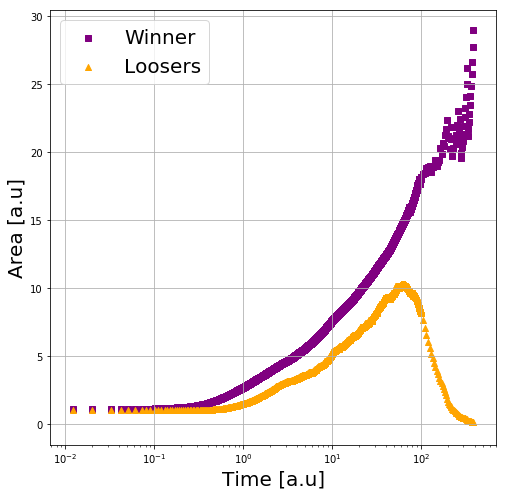

In [27]:
t, w, l = np.loadtxt(os.path.join(where, 'average_evolution_jp1e-3.dat'), unpack=True)

plt.figure(figsize=(8, 8))
plt.xscale('log')

index = [i for i in range(10000)] + [10000+i*500 for i in range(58)]

plt.scatter(t[index], w[index], color='purple', marker='s', label = 'Winner')
plt.scatter(t[index], l[index], color='orange', marker='^', label='Loosers')

plt.xlabel('Time [a.u]', fontsize=20)
plt.ylabel('Area [a.u]', fontsize=20)

plt.legend(fontsize=20)

plt.grid()
plt.show()

## Probability

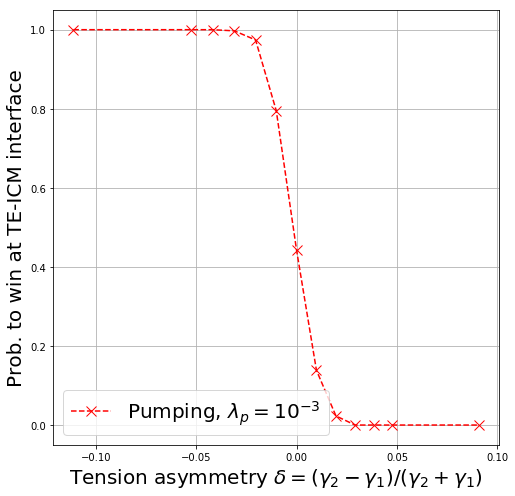

In [28]:
d_jp1e3, p_jp1e3 = np.loadtxt(os.path.join(where, 'pbty_delta_swelling_jp1e-3.dat'), unpack=True)

plt.figure(figsize=(8, 8))
plt.locator_params(nbins=6)
plt.grid()

plt.plot(d_jp1e3, p_jp1e3, color='#FF0000', label = 'Pumping, $\lambda_p=10^{-3}$', marker='x', linestyle='--', markersize=10)

plt.legend(fontsize=20)

plt.xlabel('Tension asymmetry $\delta = (\gamma_2-\gamma_1)/(\gamma_2+\gamma_1)$', fontsize=20)
plt.ylabel('Prob. to win at TE-ICM interface', fontsize=20)

plt.show()

# Supplementary figure

## Diagram

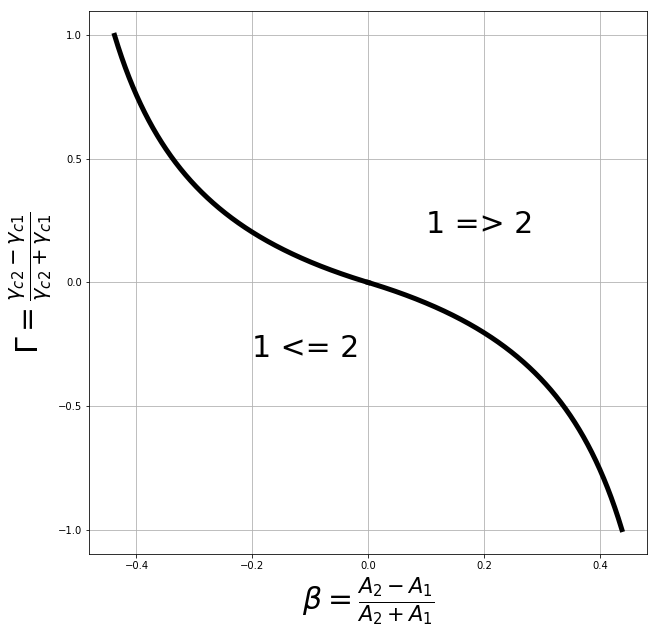

In [29]:
beta2, Gamma = np.loadtxt(os.path.join(where, 'beta_vs_Gamma.dat'), unpack=True)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

plt.locator_params(nbins=5)

ax.plot(beta2[:2001], Gamma[:2001], linewidth=5, color='k', zorder=10)
ax.plot(beta2[2001:], Gamma[2001:], linewidth=5, color='k', zorder=10)
ax.text(x=0.1, y=0.2, s='1 => 2', fontsize=30)
ax.text(x=-0.2, y=-0.3, s='1 <= 2', fontsize=30)
ax.set_xlabel(r'$\beta=\frac{A_{2}-A_{1}}{A_{2}+A_{1}}$', fontsize=30)

ax.set_ylabel(r'$\Gamma=\frac{\gamma_{c2}-\gamma_{c1}}{\gamma_{c2}+\gamma_{c1}}$', fontsize=30)

plt.grid()

plt.show()

## Probability vs $\Gamma$

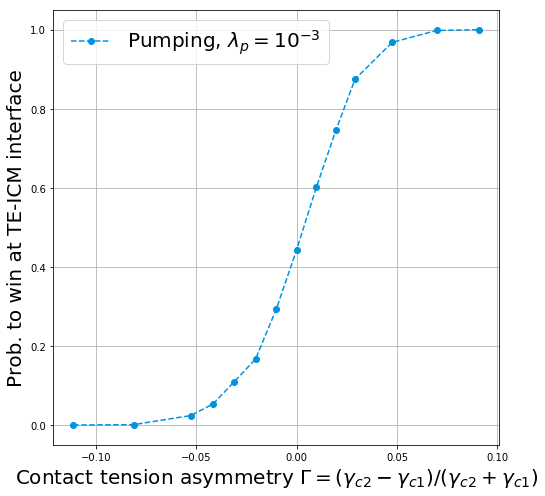

In [30]:
G_jp1e3, pG_jp1e3 = np.loadtxt(os.path.join(where, 'pbty_Gamma_swelling_jp1e-3.dat'), unpack=True)

plt.figure(figsize=(8, 8))
plt.locator_params(nbins=6)
plt.grid()

plt.plot(G_jp1e3, pG_jp1e3, color='#0093E1', label = 'Pumping, $\lambda_p=10^{-3}$', marker='o', linestyle='--')

plt.legend(fontsize=20)

plt.xlabel('Contact tension asymmetry $\Gamma = (\gamma_{c2}-\gamma_{c1})/(\gamma_{c2}+\gamma_{c1})$', fontsize=20)
plt.ylabel('Prob. to win at TE-ICM interface', fontsize=20)

plt.show()

# Supplementary text

## Winning diagram

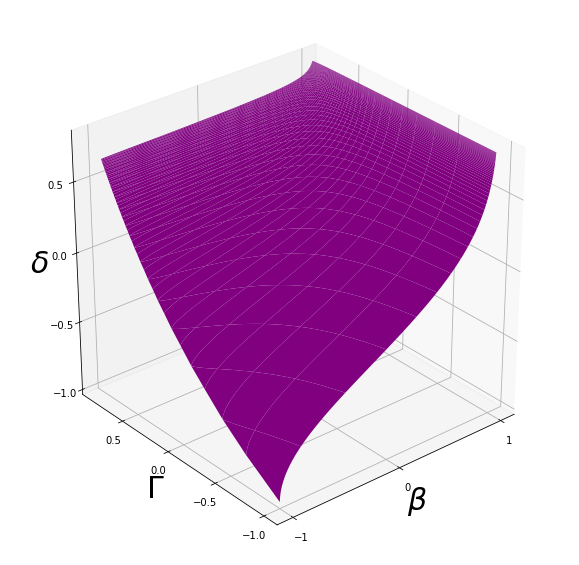

In [31]:
from mpl_toolkits.mplot3d import Axes3D
import mpl_toolkits.mplot3d.art3d as art3d

X, Y, Z = np.loadtxt(os.path.join(where, '3d_beta_mat.txt')), np.loadtxt(os.path.join(where, '3d_Gamma_mat.txt')), np.loadtxt(os.path.join(where, '3d_delta_mat.txt'))

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
plt.locator_params(nbins=4)
ax.plot_surface(X, Y, Z, color='purple', alpha=1.0, shade=False)

ax.set_xlabel(r'$\beta$', fontsize=30)
ax.xaxis.set_rotate_label(False)

ax.set_ylabel(r'$\Gamma$', fontsize=30)
ax.yaxis.set_rotate_label(False)

ax.set_zlabel(r'$\delta$', fontsize=30)
ax.zaxis.set_rotate_label(False)

ax.view_init(30, -130)

plt.show()

## Noisy networks

### Probability vs $\delta$

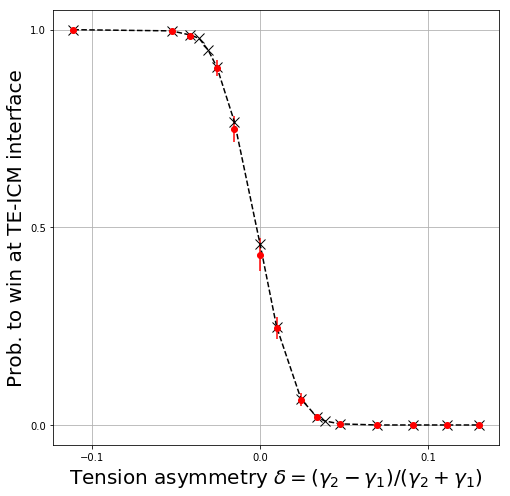

In [32]:
a, b = np.loadtxt(os.path.join(where, 'pbty_last_DELTA_asymmetry_regular.txt'), unpack=True)
c, d, e = np.loadtxt(os.path.join(where, 'pbty_last_DELTA_asymmetry_noisy.txt'), unpack=True)

plt.figure(figsize=(8, 8))
plt.locator_params(nbins=4)
plt.grid()

plt.plot(a, b, linestyle='--', color='k', markersize=10, marker='x')
plt.errorbar(c, d, e, linestyle='', color='r', marker='o')

plt.xlabel('Tension asymmetry $\delta = (\gamma_2-\gamma_1)/(\gamma_2+\gamma_1)$', fontsize=20)
plt.ylabel('Prob. to win at TE-ICM interface', fontsize=20)
plt.show()

### Probability vs $\Gamma$

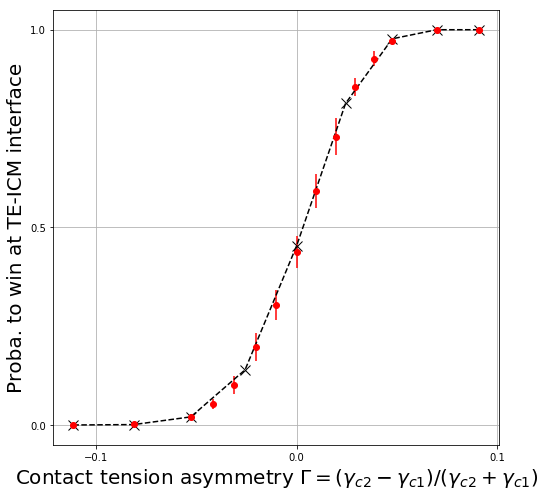

In [33]:
a, b = np.loadtxt(os.path.join(where, 'pbty_last_GAMMA_asymmetry_regular.txt'), unpack=True)
c, d, e = np.loadtxt(os.path.join(where, 'pbty_last_GAMMA_asymmetry_noisy.txt'), unpack=True)

plt.figure(figsize=(8, 8))
plt.locator_params(nbins=4)
plt.grid()

plt.plot(a[2:-3], b[2:-3], linestyle='--', color='k', marker='x', markersize=10)
plt.errorbar(c, d, e, linestyle='', color='r', marker='o')

plt.xlabel('Contact tension asymmetry $\Gamma = (\gamma_{c2}-\gamma_{c1})/(\gamma_{c2}+\gamma_{c1})$', fontsize=20)
plt.ylabel('Proba. to win at TE-ICM interface', fontsize=20)
plt.show()

## Sigma (Initial volume)

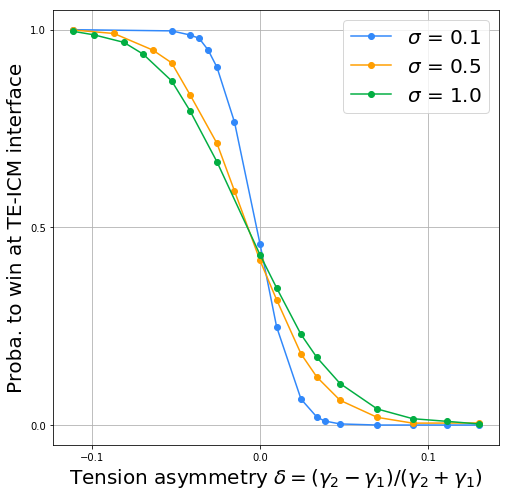

In [34]:
a, b = np.loadtxt(os.path.join(where, 'pbty_distrib_sigma0.1_asymmetry.dat'), unpack=True)
c, d = np.loadtxt(os.path.join(where, 'pbty_distrib_sigma0.5_asymmetry.dat'), unpack=True)
e, f = np.loadtxt(os.path.join(where, 'pbty_distrib_sigma1.0_asymmetry.dat'), unpack=True)

plt.figure(figsize=(8, 8))
plt.locator_params(nbins=4)
plt.grid()

plt.plot(a, b, color='#3188FA', label = '$\sigma$ = 0.1', marker='o')
plt.plot(c[1:], d[1:], color = '#FF9E00', label = '$\sigma$ = 0.5', marker='o')
plt.plot(e, f, color = '#02AE42', label = '$\sigma$ = 1.0', marker='o')

plt.legend(fontsize=20)

plt.xlabel('Tension asymmetry $\delta = (\gamma_2-\gamma_1)/(\gamma_2+\gamma_1)$', fontsize=20)
plt.ylabel('Proba. to win at TE-ICM interface', fontsize=20)

plt.show()


## Topology

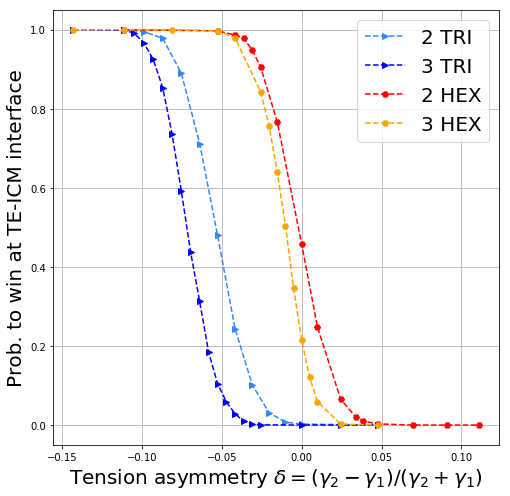

In [35]:
d_tr2, p_tr2 = np.loadtxt(os.path.join(where, 'TRI_2layer_asymmetry.dat'), unpack=True)
d_tr3, p_tr3 = np.loadtxt(os.path.join(where, 'TRI_3layer_asymmetry.dat'), unpack=True)

d_he2, p_he2 = np.loadtxt(os.path.join(where, 'HEX_2layer_asymmetry.dat'), unpack=True)
d_he3, p_he3 = np.loadtxt(os.path.join(where, 'HEX_3layer_asymmetry.dat'), unpack=True)

plt.figure(figsize=(8, 8))
plt.locator_params(nbins=6)
plt.grid()

plt.plot(d_tr2[1:], p_tr2[1:], color='#3188FA', label = '2 TRI', marker='>', linestyle='--')
plt.plot(d_tr3[1:], p_tr3[1:], color='#0000FF', label = '3 TRI', marker='>', linestyle='--')

plt.plot(d_he2[:-1], p_he2[:-1], color='#FF0000', label = '2 HEX', marker='H', linestyle='--')
plt.plot(d_he3[1:], p_he3[1:], color='#FAA500', label = '3 HEX', marker='H', linestyle='--')

plt.legend(fontsize=20)

plt.xlabel('Tension asymmetry $\delta = (\gamma_2-\gamma_1)/(\gamma_2+\gamma_1)$', fontsize=20)
plt.ylabel('Prob. to win at TE-ICM interface', fontsize=20)

plt.show()


## Pumping

### Evolution

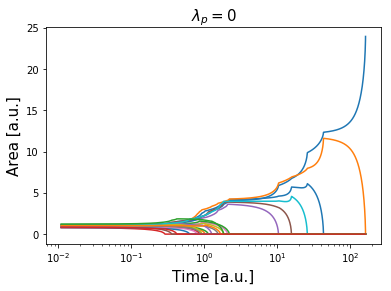

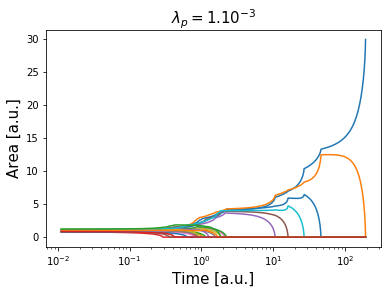

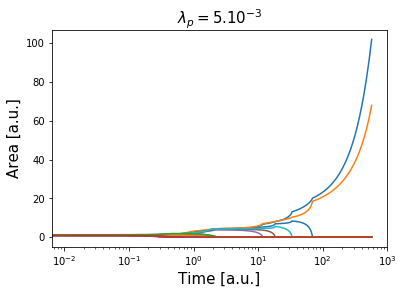

In [36]:
a0 = np.loadtxt(os.path.join(where, 'area_jp0.dat'))
a1 = np.loadtxt(os.path.join(where, 'area_jp1e-3.dat'))
a2 = np.loadtxt(os.path.join(where, 'area_jp5e-3.dat'))

plt.xscale('log')
for i in range(len(a0[0])-1) :
    plt.plot(a0[:, 0], a0[:, i+1])
plt.xlabel('Time [a.u.]', fontsize=15)
plt.ylabel('Area [a.u.]', fontsize=15)
plt.title('$\lambda_{p}=0$', fontsize=15)
plt.show()

plt.xscale('log')
for i in range(len(a1[0])-1) :
    plt.plot(a1[:, 0], a1[:, i+1])
plt.xlabel('Time [a.u.]', fontsize=15)
plt.ylabel('Area [a.u.]', fontsize=15)
plt.title('$\lambda_{p}=1.10^{-3}$', fontsize=15)
plt.show()

plt.xscale('log')
for i in range(len(a2[0])-1) :
    plt.plot(a2[:270, 0], a2[:270, i+1])
plt.xlabel('Time [a.u.]', fontsize=15)
plt.ylabel('Area [a.u.]', fontsize=15)
plt.title('$\lambda_{p}=5.10^{-3}$', fontsize=15)
plt.show()

### Probability vs $\delta$

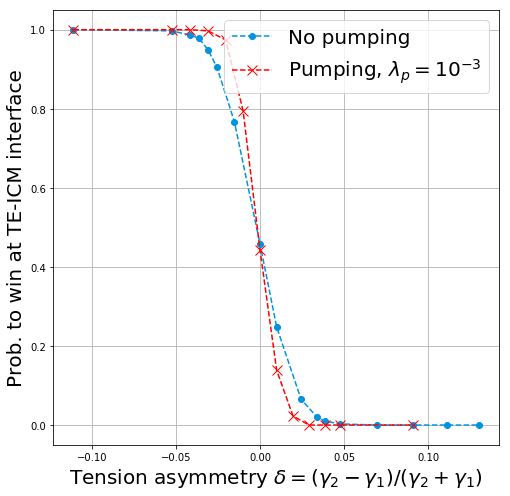

In [37]:
d_he2, p_he2 = np.loadtxt(os.path.join(where, 'HEX_2layer_asymmetry.dat'), unpack=True)
d_jp1e3, p_jp1e3 = np.loadtxt(os.path.join(where, 'pbty_delta_swelling_jp1e-3.dat'), unpack=True)
d_jp3e3, p_jp3e3 = np.loadtxt(os.path.join(where, 'pbty_delta_swelling_jp3e-3.dat'), unpack=True)

plt.figure(figsize=(8, 8))
plt.locator_params(nbins=6)
plt.grid()

plt.plot(d_he2, p_he2, color='#0093E1', label = 'No pumping', linestyle='--', marker='o')
plt.plot(d_jp1e3, p_jp1e3, color='#FF0000', label = 'Pumping, $\lambda_p=10^{-3}$', marker='x', linestyle='--', markersize=10)
#plt.plot(d_jp3e3, p_jp3e3, color='#7A6AE8', label = 'Pumping, $\lambda_p=3.10^{-3}$', marker='H', linestyle='--')

plt.legend(fontsize=20)

plt.xlabel('Tension asymmetry $\delta = (\gamma_2-\gamma_1)/(\gamma_2+\gamma_1)$', fontsize=20)
plt.ylabel('Prob. to win at TE-ICM interface', fontsize=20)

plt.show()

### Probability vs $\Gamma$

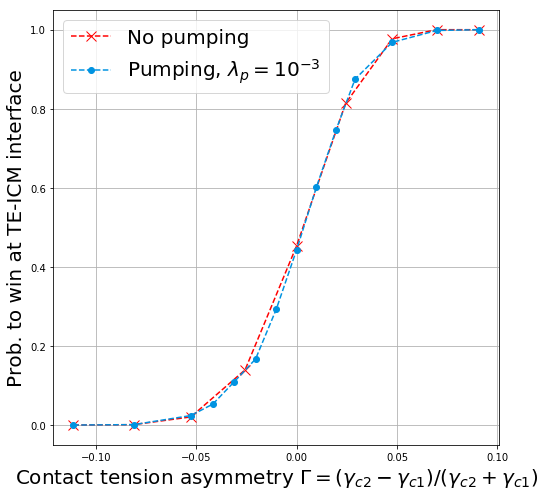

In [38]:
G_he2, pG_he2 = np.loadtxt(os.path.join(where, 'pbty_last_GAMMA_asymmetry_regular.txt'), unpack=True)
G_jp1e3, pG_jp1e3 = np.loadtxt(os.path.join(where, 'pbty_Gamma_swelling_jp1e-3.dat'), unpack=True)

plt.figure(figsize=(8, 8))
plt.locator_params(nbins=6)
plt.grid()

plt.plot(G_he2[2:-3], pG_he2[2:-3], color='#FF0000', label = 'No pumping', marker='x', linestyle='--', markersize=10)
plt.plot(G_jp1e3, pG_jp1e3, color='#0093E1', label = 'Pumping, $\lambda_p=10^{-3}$', marker='o', linestyle='--')
#plt.plot(d_jp3e3, p_jp3e3, color='#7A6AE8', label = 'Pumping, $\lambda_p=3.10^{-3}$', marker='H', linestyle='--')

plt.legend(fontsize=20)

plt.xlabel('Contact tension asymmetry $\Gamma = (\gamma_{c2}-\gamma_{c1})/(\gamma_{c2}+\gamma_{c1})$', fontsize=20)
plt.ylabel('Prob. to win at TE-ICM interface', fontsize=20)

plt.show()